UNSupervised Learning - K means learning

In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
# load dataset
df= pd.read_csv('environmental factors.csv')
df

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level
0,22.490802,52.418449,19.599966,337.165056,369.020837,84.723658
1,34.014286,49.974726,8.690240,256.681604,185.335998,49.451704
2,29.639879,40.569235,11.932794,484.024336,213.723302,19.546561
3,26.973170,66.436000,18.265613,148.540303,262.604015,73.664179
4,18.120373,58.597450,14.641787,314.535387,283.288001,41.867814
...,...,...,...,...,...,...
9995,32.153120,82.622318,24.045509,389.315259,660.200681,96.614073
9996,32.950177,32.808837,19.956484,394.037121,303.574216,37.323996
9997,33.934158,48.221908,5.389117,171.306244,774.095576,30.467486
9998,22.949760,56.599200,13.020097,245.443897,568.909821,40.736253


In [3]:
#Normalise the data - Standardscaler
scaler = StandardScaler()
scaled_df =scaler.fit_transform(df)
#Display the scaled data
print(pd.DataFrame(scaled_df,columns=df.columns).head())

   temperature  humidity  wind_speed  carbon_emissions  solar_irradiance  \
0    -0.415900 -0.452465    0.801884          0.482494         -0.684316   
1     1.587377 -0.593258   -1.100359         -0.136414         -1.389866   
2     0.826917 -1.135149   -0.534981          1.611824         -1.280827   
3     0.363328  0.355146    0.569224         -0.968007         -1.093072   
4    -1.175669 -0.096466   -0.062635          0.308475         -1.013623   

   pollution_level  
0         1.193409  
1        -0.029923  
2        -1.067119  
3         0.809835  
4        -0.292954  


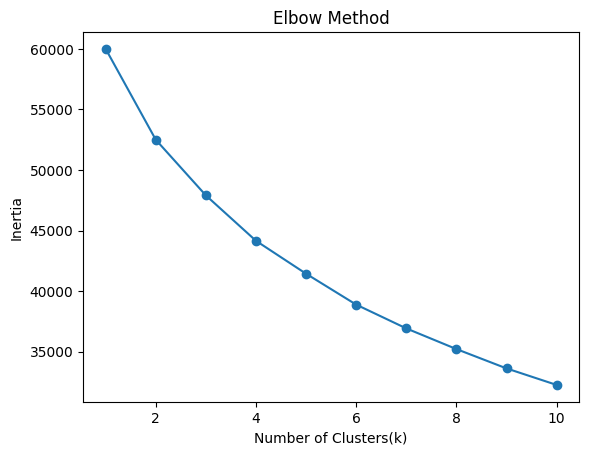

In [5]:
#use elbow method to find the optimal no. of clusters
inertia =[]
k_range = range(1,11)

for k in k_range:
    Kmeans=KMeans(n_clusters=k,random_state=42)
    Kmeans.fit(scaled_df)
    inertia.append(Kmeans.inertia_)
    #plot the inertia values to find the elbow
plt.plot(k_range,inertia,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Inertia')
plt.show()

In [12]:
#applying k means clustering with k=7
k=7
Kmeans=KMeans(n_clusters=k,random_state=42)
df['clusters']=Kmeans.fit_predict(scaled_df)
df.head()

,temperature,humidity,wind_speed,carbon_emissions,solar_irradiance,pollution_level,clusters
0,22.490802,52.418449,19.599966,337.165056,369.020837,84.723658,6
1,34.014286,49.974726,8.690240,256.681604,185.335998,49.451704,5
2,29.639879,40.569235,11.932794,484.024336,213.723302,19.546561,6
3,26.973170,66.436000,18.265613,148.540303,262.604015,73.664179,4
4,18.120373,58.597450,14.641787,314.535387,283.288001,41.867814,6


In [13]:
#calculate the silhouette score
sil_score =silhouette_score(scaled_df,df['clusters'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.12205646149181477


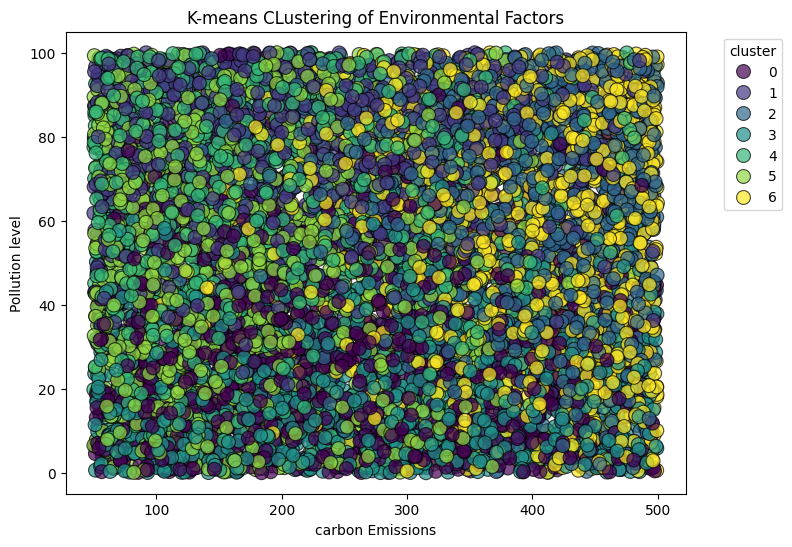

In [20]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.scatterplot(x='carbon_emissions',y='pollution_level', hue='clusters',
                data=df, palette='viridis',s=100,alpha=0.7,edgecolor='k')
plt.title('K-means CLustering of Environmental Factors')
plt.xlabel('carbon Emissions')
plt.ylabel('Pollution level')
plt.legend(title='cluster',bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()